https://agbenorh.medium.com/exploratory-data-analysis-netflix-data-918760acbff

In [108]:

import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sn
import matplotlib.pyplot as plt


In [109]:
from google.colab import files
uploaded = files.upload()

frame = pd.read_csv("netflix_titles.csv")
print(frame)

Saving netflix_titles.csv to netflix_titles (6).csv
     show_id  ...                                        description
0         s1  ...  In a future where the elite inhabit an island ...
1         s2  ...  After a devastating earthquake hits Mexico Cit...
2         s3  ...  When an army recruit is found dead, his fellow...
3         s4  ...  In a postapocalyptic world, rag-doll robots hi...
4         s5  ...  A brilliant group of students become card-coun...
...      ...  ...                                                ...
7782   s7783  ...  When Lebanon's Civil War deprives Zozo of his ...
7783   s7784  ...  A scrappy but poor boy worms his way into a ty...
7784   s7785  ...  In this documentary, South African rapper Nast...
7785   s7786  ...  Dessert wizard Adriano Zumbo looks for the nex...
7786   s7787  ...  This documentary delves into the mystique behi...

[7787 rows x 12 columns]


Questions:


1.   What is the content makeup on Netflix?
2.   How many programs does each rating have?
3.   What are the top 10 content-producing countries?
4.   What are the top 5 genres on Netflix?
5.   What year had the most content released?
6.   How much content has been released throughout the years?







In [110]:
# finding any duplicate data
frame.shape
duplicate = frame[frame.duplicated()]
print('Number of duplicate rows: ', duplicate.shape) 

Number of duplicate rows:  (0, 12)


In [111]:
# showing the entries with missing information
frame.isnull().sum() 

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [112]:
# filling in missing rating information
frame[frame["rating"].isna()] 
missingRating = {67: 'TV-PG', 2359: 'TV-14', 3660: 'TV-MA', 3736: 'TV-MA', 3737: 'NR', 3738: 'TV-MA', 4323: 'TV-MA '}

for id, rating in missingRating.items():
    frame.iloc[id, 8] = rating
frame['rating'].isna().sum()

0

In [113]:
# filling in missing country information
frame['country'] = frame['country'].fillna(frame['country'].mode()[0])
frame['country'].isna().sum()

0

In [114]:
# dropping irrelevant columns with missing information
frame = frame.drop(['date_added', 'cast', 'director'], axis=1)
frame.columns

Index(['show_id', 'type', 'title', 'country', 'release_year', 'rating',
       'duration', 'listed_in', 'description'],
      dtype='object')

In [115]:
frame.isnull().sum()

show_id         0
type            0
title           0
country         0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [116]:
frame.shape

(7787, 9)

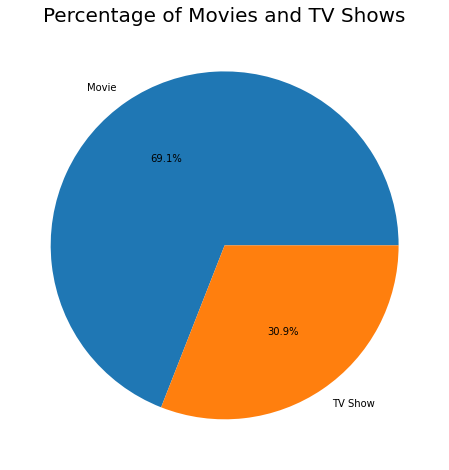

In [117]:
# pie chart to see percentage of netflix programs either movie or tv show

programType = frame.groupby(by='type').show_id.count()
programType =pd.DataFrame(programType)
plt.figure(figsize = (12,8))
plt.pie(programType.show_id, labels = programType.index ,autopct='%1.1f%%')
plt.title('Percentage of Movies and TV Shows', fontsize=20)
plt.show()

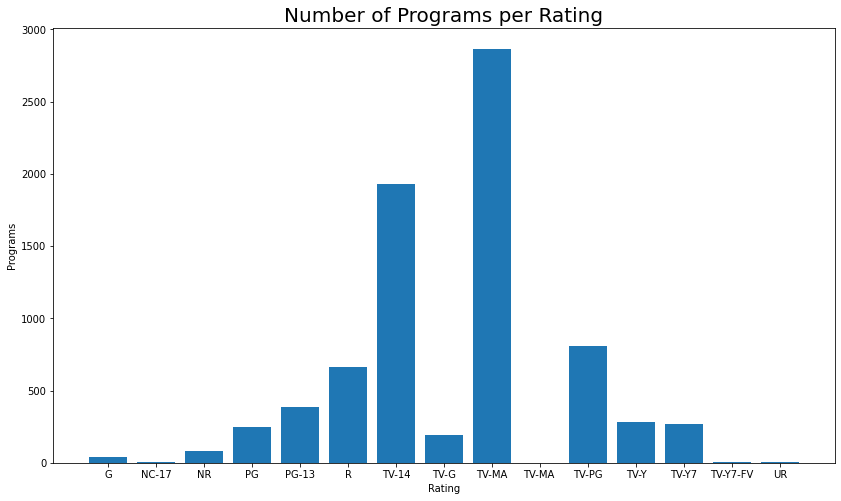

In [118]:
# bar graph of number of programs per rating

ratings = frame.groupby(by="rating").show_id.count()
ratings = pd.DataFrame(ratings)
ratings = ratings.reset_index()
plt.figure(figsize = (14,8))
plt.title('Number of Programs per Rating',fontsize=20)
plt.xlabel('Rating')
plt.ylabel('Programs')
plt.bar(ratings.rating, ratings.show_id)
plt.show()

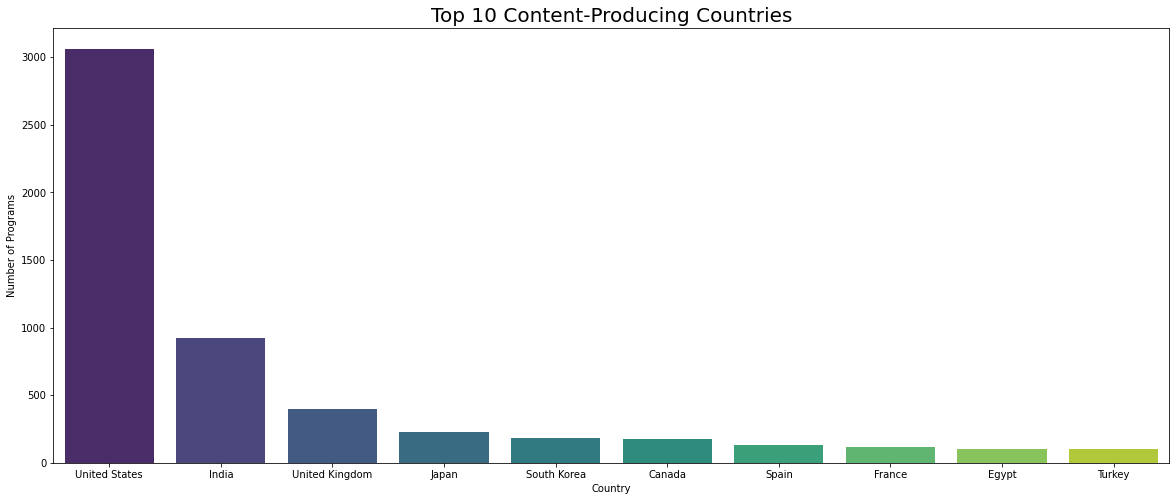

In [119]:
# comparing the top 10 countries for number of programs on Netflix

plt.figure(figsize=(20,8))
sn.countplot(x="country",data= frame,order = frame['country'].value_counts().index[0:10], palette = "viridis")
plt.title("Top 10 Content-Producing Countries", fontsize=20)
plt.xlabel('Country')
plt.ylabel('Number of Programs')
plt.show()


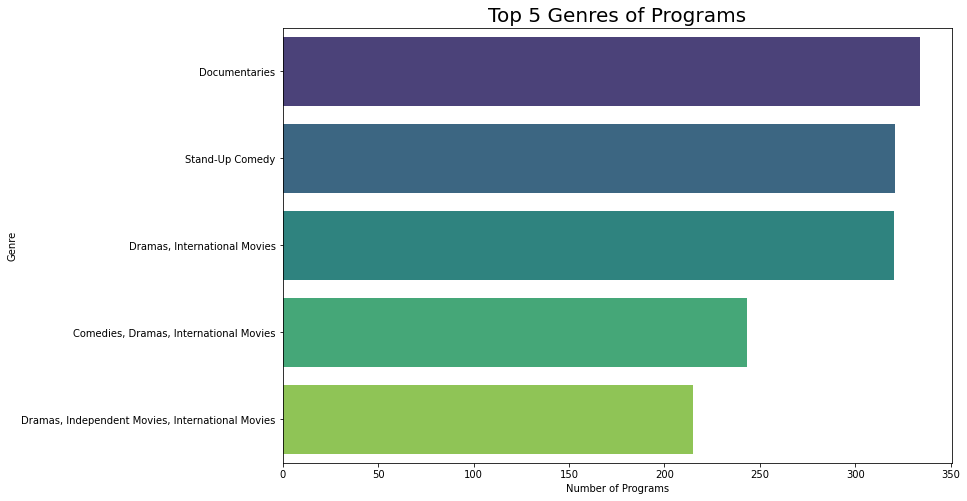

In [120]:
# bar graph with the 5 top genres
plt.figure(figsize=(12,8))
sn.countplot(y='listed_in',data = frame,order =frame["listed_in"].value_counts().index[0:5], palette = "viridis")
plt.title("Top 5 Genres of Programs", fontsize=20)
plt.ylabel("Genre")
plt.xlabel("Number of Programs")
plt.show()

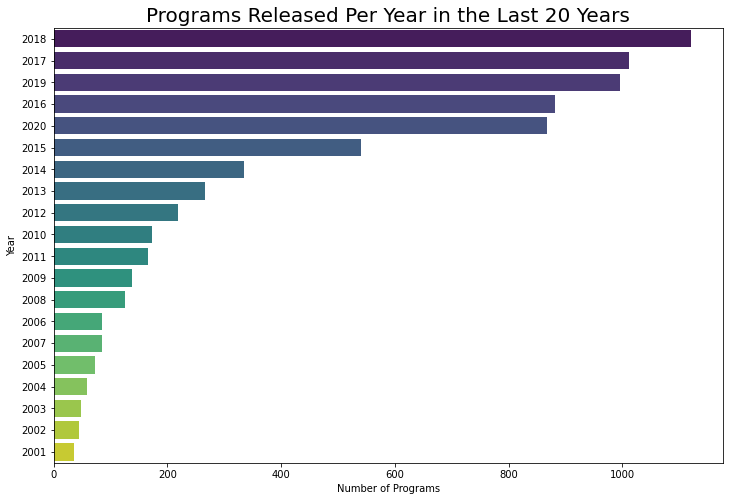

In [121]:
# ascending bar chart for programs released in the past 20 years
plt.figure(figsize=(12,8))
plt.title("Programs Released Per Year in the Last 20 Years", fontsize=20)
sn.countplot(y ="release_year", data = frame, order = frame['release_year'].value_counts().index[0:20], palette = "viridis")
plt.xlabel("Number of Programs")
plt.ylabel("Year")
plt.show()

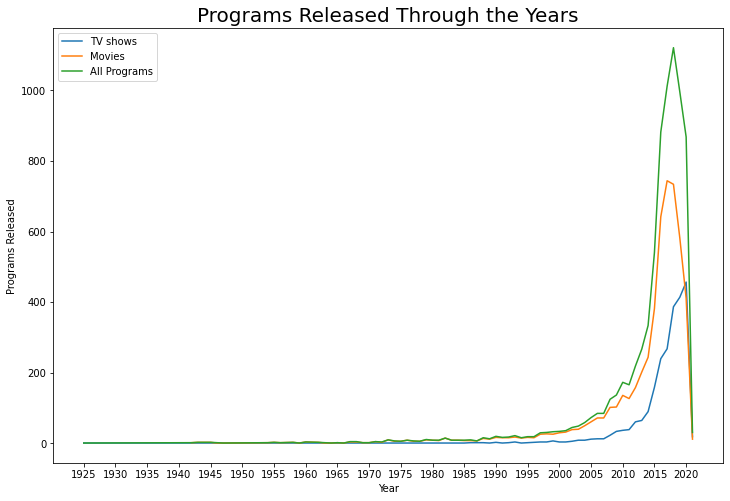

In [122]:
# graph showing content released throughout the years

shows = frame[frame['type'] == 'TV Show']
movies = frame[frame['type'] == 'Movie']
showsCount = shows['release_year'].value_counts().sort_index()
moviesCount = movies['release_year'].value_counts().sort_index()
overall = frame['release_year'].value_counts().sort_index()

plt.figure(figsize=(12, 8))
plt.plot(showsCount.index, showsCount.values, label='TV shows')
plt.plot(moviesCount.index, moviesCount.values, label='Movies')
plt.plot(overall.index, overall.values, label='All Programs')
plt.title('Programs Released Through the Years', fontsize=20)
plt.xticks(list(range(1925, 2022, 5)))
plt.xlabel('Year')
plt.ylabel('Programs Released')
plt.legend()
plt.show()